In [1]:
install.packages("tm")

also installing the dependencies 'NLP', 'slam'




  There are binary versions available but the source versions are later:
     binary source needs_compilation
slam 0.1-48 0.1-50              TRUE
tm    0.7-8  0.7-9              TRUE

  Binaries will be installed
package 'NLP' successfully unpacked and MD5 sums checked
package 'slam' successfully unpacked and MD5 sums checked
package 'tm' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\user\AppData\Local\Temp\RtmpsXWOsh\downloaded_packages


In [2]:
library(tm)

Warning message:
"package 'tm' was built under R version 3.6.3"Loading required package: NLP
Warning message:
"package 'NLP' was built under R version 3.6.3"

In [3]:
install.packages("readxl")
library(readxl)

also installing the dependency 'cpp11'




  There are binary versions available but the source versions are later:
       binary source needs_compilation
cpp11   0.2.7  0.4.3             FALSE
readxl  1.3.1  1.4.1              TRUE

  Binaries will be installed
package 'readxl' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\user\AppData\Local\Temp\RtmpsXWOsh\downloaded_packages


installing the source package 'cpp11'

Warning message:
"package 'readxl' was built under R version 3.6.3"

In [6]:
uspd <- read_excel("C:/Users/user/Documents/big_data/uspd_AB.xls")

In [126]:
uspd

<<SimpleCorpus>>
Metadata:  corpus specific: 1, document level (indexed): 0
Content:  documents: 3000

In [7]:
uspd.m = as.matrix(uspd)

In [8]:
uspd.cor = Corpus(VectorSource(uspd.m))

In [9]:
uspd.cor

<<SimpleCorpus>>
Metadata:  corpus specific: 1, document level (indexed): 0
Content:  documents: 3000

In [10]:
uspd <- tm_map(uspd.cor,removePunctuation) # 문장부호 제거

Warning message in tm_map.SimpleCorpus(uspd.cor, removePunctuation):
"transformation drops documents"

In [11]:
uspd <- tm_map(uspd, removeNumbers) # 수치 제거

Warning message in tm_map.SimpleCorpus(uspd, removeNumbers):
"transformation drops documents"

In [12]:
uspd <- tm_map(uspd, tolower) # 영문 소문자로 변경

Warning message in tm_map.SimpleCorpus(uspd, tolower):
"transformation drops documents"

In [13]:
uspd <- tm_map(uspd, removeWords, stopwords('english')) # 불용어 제거(국가명으로 변경 가능)

Warning message in tm_map.SimpleCorpus(uspd, removeWords, stopwords("english")):
"transformation drops documents"

In [14]:
uspd <- tm_map(uspd, stripWhitespace) # 공백 제거

Warning message in tm_map.SimpleCorpus(uspd, stripWhitespace):
"transformation drops documents"

In [127]:
install.packages("SnowballC")
library("SnowballC")
uspd <- tm_map(uspd,stemDocument) # 어근만 남기기

Warning message:
"package 'SnowballC' is in use and will not be installed"Warning message in tm_map.SimpleCorpus(uspd, stemDocument):
"transformation drops documents"

In [16]:
inspect(uspd[531]) # 5공학관 531호 빅데이터분석연구실

<<SimpleCorpus>>
Metadata:  corpus specific: 1, document level (indexed): 0
Content:  documents: 1

[1] apparatus includ integr circuit includ incircuit power switch coupl power suppli node function circuit coupl incircuit power switch ground node test circuit test power switch coupl test circuit wherein test power switch replica incircuit power switch test circuit configur determin characterist test power switch measur voltag differ across incircuit power switch test circuit also configur use characterist test power switch voltag differ determin power consumpt function circuit


In [17]:
uspd[[531]]$meta # 메타 정보

  author       : character(0)
  datetimestamp: 2022-11-29 19:15:30
  description  : character(0)
  heading      : character(0)
  id           : 531
  language     : en
  origin       : character(0)

In [45]:
ptdm = DocumentTermMatrix(uspd)
inspect(ptdm) # 요약

<<DocumentTermMatrix (documents: 3000, terms: 4329)>>
Non-/sparse entries: 96553/12890447
Sparsity           : 99%
Maximal term length: 30
Weighting          : term frequency (tf)
Sample             :
      Terms
Docs   devic display electron first includ input may one second user
  1026     0       8        0     0      4     2   0   1      0    6
  1087    16       0        1     0      0     0   0   0      0   14
  1884     3      22        0    12      0     0   0   3      5    3
  2057     3      16        1     5      3     0   0   0      5    0
  2116     3      22        0    12      0     0   0   3      5    3
  2170     3      22        0    12      0     0   0   3      5    3
  410     16       0        1     0      0     0   0   0      0   14
  591      0       4        0     9      9     2   0   3      9    4
  648     16       0        1     0      0     0   0   0      0   14
  703      0       8        0     0      4     2   0   1      0    6


In [19]:
inspect(ptdm[1:531, 1:5]) # 1-531번 특허의 1-5번 단어 확인

<<DocumentTermMatrix (documents: 531, terms: 5)>>
Non-/sparse entries: 115/2540
Sparsity           : 96%
Maximal term length: 7
Weighting          : term frequency (tf)
Sample             :
     Terms
Docs  area array buildup bump chip
  1      1     1       3    1    1
  184    1     3       0    0    3
  19     2     2       0    0    0
  200    0     5       0    0    0
  52     9     0       1    0    0
  53     9     0       1    0    0
  54     9     0       1    0    0
  66     0     4       0    0    2
  71     1     0       0    0    7
  95     1     3       0    0    3


### TF-IDF Score Equation


The general structure of the Document-Term Matrix for a text corpus containing M documents, and N terms

- D1, D2, ..., DM are the M documents.
- T1, T2, ..., TN are the N terms
- The TF-IDF score (`w_{ij}`) is given by the following equation:

$$ w_{ij}=TF_{ij}*log(M/df_{j}) $$

where `TF_(ij)` is the number of times the term  `T_j` occurs in the document  `D_i`.

 `df_j` is the number of documents containing the term `T_j`  

A term that occurs frequently in a particular document, and rarely across the entire corpus has a higher IDF score.

In [20]:
ptdm2 <- DocumentTermMatrix(uspd,control=list(weighting=weightTfIdf)) # tf-idf

Warning message in TermDocumentMatrix.SimpleCorpus(x, control):
"custom functions are ignored"

<<DocumentTermMatrix (documents: 1, terms: 1)>>
Non-/sparse entries: 0/1
Sparsity           : 100%
Maximal term length: 6
Weighting          : term frequency - inverse document frequency (normalized) (tf-idf)
Sample             :
     Terms
Docs  mechan
  531      0


In [130]:
inspect(ptdm2[1:10,1:10])

<<DocumentTermMatrix (documents: 10, terms: 10)>>
Non-/sparse entries: 15/85
Sparsity           : 85%
Maximal term length: 7
Weighting          : term frequency - inverse document frequency (normalized) (tf-idf)
Sample             :
    Terms
Docs       area      array   buildup     bump      chip    combin   contact
  1  0.09652196 0.09450976 0.5961404 0.262517 0.1597087 0.1227500 0.1934603
  10 0.00000000 0.00000000 0.0000000 0.000000 0.0000000 0.1102245 0.0000000
  2  0.00000000 0.00000000 0.0000000 0.000000 0.0000000 0.0000000 0.0000000
  3  0.00000000 0.00000000 0.0000000 0.000000 0.0000000 0.0000000 0.0000000
  4  0.00000000 0.00000000 0.0000000 0.000000 0.0000000 0.0000000 0.0000000
  5  0.00000000 0.00000000 0.0000000 0.000000 0.0000000 0.0000000 0.0000000
  6  0.00000000 0.00000000 0.0000000 0.000000 0.0000000 0.0000000 0.0000000
  7  0.00000000 0.00000000 0.0000000 0.000000 0.0000000 0.0000000 0.0000000
  8  0.00000000 0.00000000 0.0000000 0.000000 0.0000000 0.0000000 0.00000

In [26]:
#View(as.matrix(ptdm)) # 전체 매트릭스 확인
PTDM2 = as.data.frame(as.matrix(ptdm2))

In [65]:
dim(PTDM2)

[1] 3000 4329

In [66]:
install.packages('textmineR')

also installing the dependencies 'MatrixExtra', 'rsparse', 'mlapi', 'lgr', 'ISOcodes', 'RcppEigen', 'gtools', 'text2vec', 'stopwords', 'RcppProgress', 'RSpectra', 'RcppArmadillo'




  There are binary versions available but the source versions are later:
                  binary     source needs_compilation
rsparse            0.4.0      0.5.1              TRUE
mlapi              0.1.0      0.1.1             FALSE
lgr                0.4.2      0.4.4             FALSE
ISOcodes      2021.02.24 2022.09.29             FALSE
RcppEigen      0.3.3.9.1  0.3.3.9.3              TRUE
gtools             3.8.2      3.9.4              TRUE
text2vec             0.6      0.6.2              TRUE
stopwords            2.2        2.3             FALSE
RSpectra          0.16-0     0.16-1              TRUE
RcppArmadillo 0.10.4.0.0 0.11.4.2.1              TRUE
textmineR          3.0.4      3.0.5              TRUE

  Binaries will be installed


Package which is only available in source form, and may need
  compilation of C/C++/Fortran: 'MatrixExtra'


  These will not be installed
package 'rsparse' successfully unpacked and MD5 sums checked
package 'RcppEigen' successfully unpacked and MD5 sums checked
package 'gtools' successfully unpacked and MD5 sums checked
package 'text2vec' successfully unpacked and MD5 sums checked
package 'RcppProgress' successfully unpacked and MD5 sums checked
package 'RSpectra' successfully unpacked and MD5 sums checked
package 'RcppArmadillo' successfully unpacked and MD5 sums checked
package 'textmineR' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\user\AppData\Local\Temp\RtmpsXWOsh\downloaded_packages


installing the source packages 'mlapi', 'lgr', 'ISOcodes', 'stopwords'

Warning message in download.file(url, destfile, method, mode = "wb", ...):
"downloaded length 212992 != reported length 580349"Warning message in install.packages("textmineR"):
"installation of package 'lgr' had non-zero exit status"

In [67]:
library(textmineR)

Warning message:
"package 'textmineR' was built under R version 3.6.3"Loading required package: Matrix
Warning message:
"package 'Matrix' was built under R version 3.6.3"
Attaching package: 'textmineR'

The following object is masked from 'package:Matrix':

    update

The following object is masked from 'package:stats':

    update



In [136]:
dim(ptdm2)

[1] 3000 4329

In [75]:
lsa_model <- FitLsaModel(dtm = as.matrix(ptdm2), k = 100)

In [135]:
lsa_model$theta

t_1,t_2,t_3,t_4,t_5,t_6,t_7,t_8,t_9,t_10,...,t_91,t_92,t_93,t_94,t_95,t_96,t_97,t_98,t_99,t_100
-0.01331010,0.02777344,3.715599e-02,2.133736e-03,0.031738872,-0.0225308540,-0.0117228347,0.0033153977,-0.0173767770,0.0101894766,...,0.011294858,0.0125627162,0.0030555840,0.001012615,-0.014973940,0.0149540502,0.0001450357,0.002760476,0.0014102222,-0.0059305120
-0.01361744,0.01581203,-1.534687e-02,6.302568e-04,0.012799361,0.0011463652,0.0096926807,-0.0080196357,-0.0005730708,-0.0006554322,...,-0.037994351,-0.0146042368,-0.0094466850,0.004375578,-0.001093828,-0.0215406938,0.0048699304,0.023684866,-0.0128122351,0.0251426413
-0.01270057,0.02157124,-2.637785e-03,-2.527090e-03,0.006996927,-0.0182974169,-0.0057632471,0.0015802602,0.0057056910,-0.0014441331,...,-0.009294446,0.0014531543,-0.0065786752,0.003103496,-0.005351547,0.0057408983,-0.0017735817,0.016124468,0.0104699670,-0.0101552854
-0.01678279,0.02385342,-2.664223e-02,7.522077e-05,0.005048419,-0.0004099353,0.0013914184,0.0017546443,-0.0043073889,0.0119591682,...,0.005184136,-0.0021211059,-0.0032349100,0.025724580,0.009450177,-0.0001958743,0.0112364987,-0.002260953,0.0093312038,0.0198298233
-0.01664983,0.02674917,-2.361674e-02,1.905478e-04,-0.001551567,-0.0076435028,-0.0008691036,0.0025152601,0.0041131633,0.0100572875,...,-0.005409586,-0.0125461786,-0.0061555613,0.027526883,0.010298858,0.0008869672,0.0247783564,-0.003021563,-0.0013269785,0.0267607760
-0.01664983,0.02674917,-2.361674e-02,1.905478e-04,-0.001551567,-0.0076435028,-0.0008691036,0.0025152601,0.0041131633,0.0100572875,...,-0.005409586,-0.0125461786,-0.0061555613,0.027526883,0.010298858,0.0008869672,0.0247783564,-0.003021563,-0.0013269785,0.0267607760
-0.01903713,0.03692884,-3.732655e-03,-6.165651e-04,0.021427461,-0.0229345231,0.0035315436,-0.0013458380,0.0005789934,0.0076238971,...,0.012074117,0.0193453323,0.0066376277,0.016394600,-0.016247883,0.0330833843,-0.0005912202,-0.026056094,-0.0110144552,-0.0191438610
-0.01047549,0.01806337,2.545693e-02,4.193568e-03,0.017176396,-0.0164500132,-0.0015847580,-0.0027037250,-0.0204325095,0.0179455433,...,-0.008199024,0.0240314536,-0.0130246048,0.045301994,0.020057505,0.0047546746,-0.0117842891,0.002867388,-0.0084863660,0.0047266643
-0.01559427,0.02451514,2.994137e-02,4.841249e-03,0.007166416,0.0156915168,0.0192412765,-0.0068783333,-0.0121797348,0.0149409570,...,0.045881569,0.0115010742,0.0192392847,-0.010755499,-0.004785535,0.0138668642,-0.0122809771,-0.025970957,0.0248191338,-0.0051558524
-0.01113896,0.01919333,1.891810e-02,1.079052e-03,0.021939324,-0.0104699784,-0.0109950865,0.0046314167,-0.0133838596,0.0059164297,...,0.003359671,0.0098494371,-0.0050144711,-0.006402139,-0.004040524,-0.0003139154,-0.0060223953,0.007480300,0.0082750920,0.0111321169


In [137]:
lsa_model$phi

,area,array,buildup,bump,chip,combin,contact,dam,describ,embed,...,adjustableappear,locationinput,predicteddestin,voicebas,limb,dome,keypad,ledsol,microtransf,reexecut
t_1,-0.043414319,-0.037857229,-0.0023760833,-0.0003890787,-0.0142421641,-1.244339e-02,-0.047322553,-0.0003890787,-0.066532549,-0.0097808453,...,-9.575966e-04,-4.523598e-04,-4.523598e-04,-4.523598e-04,-2.541847e-04,-2.556631e-04,-2.556631e-04,-5.085268e-04,-2.542634e-04,-2.183361e-04
t_2,0.022461328,0.079849786,0.0053039157,0.0011491740,0.0290903599,1.474111e-02,-0.019713422,0.0011491740,-0.040817213,0.0130462121,...,1.518782e-03,-3.922495e-04,-3.922495e-04,-3.922495e-04,-1.147425e-04,1.120963e-04,1.120963e-04,4.607736e-04,2.303868e-04,4.544933e-05
t_3,0.059474032,0.078303134,0.0081017246,0.0017695326,0.0160662452,3.719805e-04,0.041276139,0.0017695326,0.013855243,0.0131405442,...,2.196332e-03,1.585344e-04,1.585344e-04,1.585344e-04,2.909423e-05,1.639358e-04,1.639358e-04,8.059359e-04,4.029679e-04,-3.094710e-04
t_4,0.031235265,-0.001347939,0.0009421044,0.0001075927,-0.0029204930,-4.318993e-03,0.053132942,0.0001075927,-0.033882905,-0.0004012288,...,3.674244e-05,4.991853e-04,4.991853e-04,4.991853e-04,1.271394e-04,4.800449e-04,4.800449e-04,8.117872e-04,4.058936e-04,7.532008e-05
t_5,0.002534048,0.039271226,0.0091983973,0.0016651680,0.0312771702,-1.083691e-02,0.007718006,0.0016651680,0.137408723,0.0107155554,...,1.253268e-03,-7.116815e-05,-7.116815e-05,-7.116815e-05,1.124909e-04,-9.756821e-05,-9.756821e-05,3.508159e-04,1.754080e-04,-2.724681e-04
t_6,-0.077437998,-0.057965736,-0.0061316746,-0.0012096621,-0.0155372786,-2.355433e-03,-0.055509251,-0.0012096621,0.023133560,-0.0045866500,...,-5.169183e-04,2.296811e-04,2.296811e-04,2.296811e-04,2.599953e-04,-8.417475e-04,-8.417475e-04,-1.981951e-03,-9.909757e-04,-2.794891e-05
t_7,-0.008523624,-0.041196771,-0.0038207316,-0.0006434711,-0.0218850664,-1.135428e-02,0.031383903,-0.0006434711,-0.086675962,-0.0106684734,...,-1.726747e-04,6.638816e-05,6.638816e-05,6.638816e-05,6.698473e-05,3.828516e-04,3.828516e-04,6.206387e-04,3.103194e-04,-1.357317e-04
t_8,-0.011558132,0.013990740,0.0013546822,0.0001853103,0.0098260954,3.973218e-03,-0.017749254,0.0001853103,0.047112587,0.0046340580,...,2.865518e-04,2.077123e-05,2.077123e-05,2.077123e-05,-4.286006e-05,-3.635810e-04,-3.635810e-04,-6.505794e-04,-3.252897e-04,-7.175580e-05
t_9,-0.005460144,-0.011433033,-0.0053527256,-0.0010013804,-0.0003971911,2.487208e-03,-0.014618314,-0.0010013804,0.070724342,-0.0114874422,...,-2.052644e-04,-1.653057e-04,-1.653057e-04,-1.653057e-04,-3.405801e-04,-2.891332e-04,-2.891332e-04,-4.608452e-04,-2.304226e-04,-2.008938e-04
t_10,-0.024100351,0.021550578,0.0046616741,0.0006022797,0.0031098947,-2.164183e-03,-0.063644004,0.0006022797,-0.007423667,0.0075754626,...,4.104807e-04,-4.495227e-04,-4.495227e-04,-4.495227e-04,-7.761259e-06,-5.315715e-04,-5.315715e-04,-9.895870e-04,-4.947935e-04,2.382350e-04


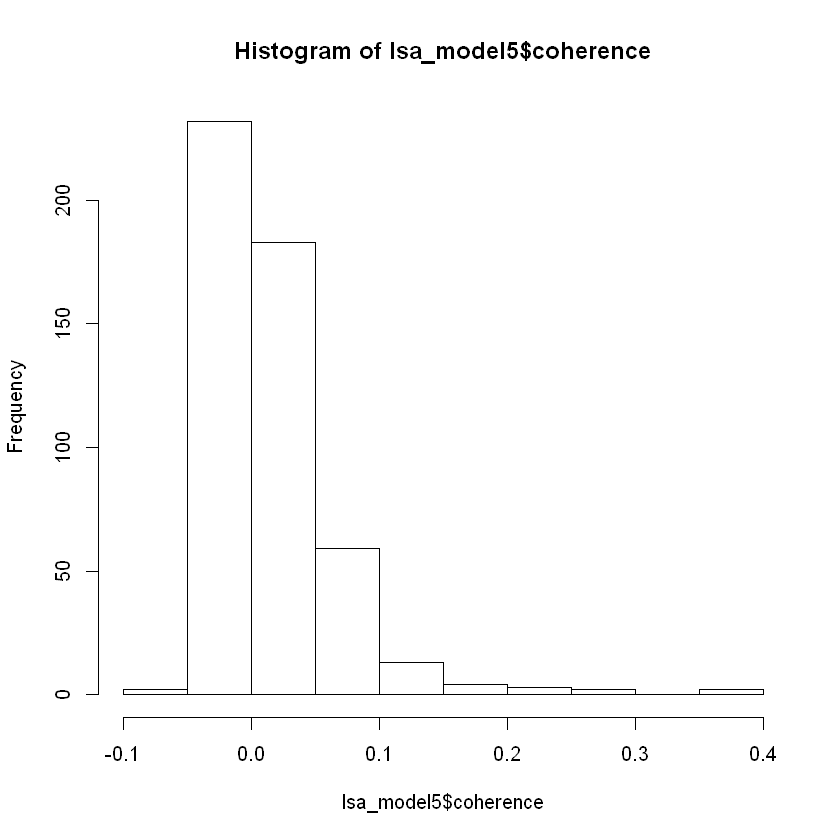

In [115]:
hist(lsa_model5$coherence)

In [79]:
str(lsa_model)

List of 6
 $ sv       : num [1:100] 8.98 6.34 5.51 5.21 5 ...
 $ theta    : num [1:3000, 1:100] -0.0133 -0.0136 -0.0127 -0.0168 -0.0166 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:3000] "1" "2" "3" "4" ...
  .. ..$ : chr [1:100] "t_1" "t_2" "t_3" "t_4" ...
 $ phi      : num [1:100, 1:4329] -0.04341 0.02246 0.05947 0.03124 0.00253 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:100] "t_1" "t_2" "t_3" "t_4" ...
  .. ..$ : chr [1:4329] "area" "array" "buildup" "bump" ...
 $ gamma    : num [1:100, 1:4329] -0.004834 0.00354 0.010789 0.006 0.000506 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:100] "t_1" "t_2" "t_3" "t_4" ...
  .. ..$ : chr [1:4329] "area" "array" "buildup" "bump" ...
 $ coherence: Named num [1:100] 0.3997 0.0917 0.2104 0.0505 -0.0404 ...
  ..- attr(*, "names")= chr [1:100] "t_1" "t_2" "t_3" "t_4" ...
 $ data     : num [1:3000, 1:4329] 0.0965 0 0 0 0 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ Docs : chr [1:3000] "1" "2" "3" "4" ...
 

In [85]:
lsa_model$gamma

,area,array,buildup,bump,chip,combin,contact,dam,describ,embed,...,adjustableappear,locationinput,predicteddestin,voicebas,limb,dome,keypad,ledsol,microtransf,reexecut
t_1,-0.0048342784,-0.0042154844,-2.645820e-04,-4.332476e-05,-1.585896e-03,-1.385598e-03,-0.0052694688,-4.332476e-05,-0.007408543,-1.089118e-03,...,-1.066305e-04,-5.037125e-05,-5.037125e-05,-5.037125e-05,-2.830401e-05,-2.846865e-05,-2.846865e-05,-5.662556e-05,-2.831278e-05,-2.431220e-05
t_2,0.0035402513,0.0125855561,8.359788e-04,1.811275e-04,4.585089e-03,2.323426e-03,-0.0031071390,1.811275e-04,-0.006433421,2.056284e-03,...,2.393834e-04,-6.182456e-05,-6.182456e-05,-6.182456e-05,-1.808519e-05,1.766810e-05,1.766810e-05,7.262501e-05,3.631251e-05,7.163514e-06
t_3,0.0107894612,0.0142053363,1.469772e-03,3.210191e-04,2.914652e-03,6.748272e-05,0.0074880966,3.210191e-04,0.002513544,2.383887e-03,...,3.984469e-04,2.876046e-05,2.876046e-05,2.876046e-05,5.278120e-06,2.974036e-05,2.974036e-05,1.462086e-04,7.310429e-05,-5.614258e-05
t_4,0.0059997049,-0.0002589135,1.809605e-04,2.066653e-05,-5.609716e-04,-8.295970e-04,0.0102058353,2.066653e-05,-0.006508267,-7.706848e-05,...,7.057529e-06,9.588408e-05,9.588408e-05,9.588408e-05,2.442109e-05,9.220756e-05,9.220756e-05,1.559290e-04,7.796450e-05,1.446757e-05
t_5,0.0005064354,0.0078484454,1.838321e-03,3.327877e-04,6.250815e-03,-2.165781e-03,0.0015424614,3.327877e-04,0.027461452,2.141529e-03,...,2.504686e-04,-1.422312e-05,-1.422312e-05,-1.422312e-05,2.248156e-05,-1.949923e-05,-1.949923e-05,7.011138e-05,3.505569e-05,-5.445339e-05
t_6,-0.0158373730,-0.0118549679,-1.254031e-03,-2.473962e-04,-3.177635e-03,-4.817256e-04,-0.0113525756,-2.473962e-04,0.004731202,-9.380471e-04,...,-1.057185e-04,4.697364e-05,4.697364e-05,4.697364e-05,5.317341e-05,-1.721515e-04,-1.721515e-04,-4.053424e-04,-2.026712e-04,-5.716021e-06
t_7,-0.0017822281,-0.0086139465,-7.988873e-04,-1.345451e-04,-4.576009e-03,-2.374098e-03,0.0065621469,-1.345451e-04,-0.018123316,-2.230701e-03,...,-3.610503e-05,1.388128e-05,1.388128e-05,1.388128e-05,1.400602e-05,8.005151e-05,8.005151e-05,1.297711e-04,6.488553e-05,-2.838052e-05
t_8,-0.0024609010,0.0029788399,2.884323e-04,3.945536e-05,2.092124e-03,8.459581e-04,-0.0037790844,3.945536e-05,0.010030982,9.866610e-04,...,6.101121e-05,4.422509e-06,4.422509e-06,4.422509e-06,-9.125554e-06,-7.741188e-05,-7.741188e-05,-1.385182e-04,-6.925909e-05,-1.527789e-05
t_9,-0.0011986063,-0.0025097702,-1.175026e-03,-2.198222e-04,-8.719108e-05,5.459899e-04,-0.0032090004,-2.198222e-04,0.015525350,-2.521714e-03,...,-4.505947e-05,-3.628777e-05,-3.628777e-05,-3.628777e-05,-7.476386e-05,-6.347029e-05,-6.347029e-05,-1.011644e-04,-5.058219e-05,-4.410005e-05
t_10,-0.0054264061,0.0048523023,1.049617e-03,1.356086e-04,7.002202e-04,-4.872849e-04,-0.0143300077,1.356086e-04,-0.001671504,1.705682e-03,...,9.242334e-05,-1.012140e-04,-1.012140e-04,-1.012140e-04,-1.747516e-06,-1.196880e-04,-1.196880e-04,-2.228142e-04,-1.114071e-04,5.364071e-05


In [111]:
lsa_model$top_terms <- GetTopTerms(phi = lsa_model$phi, M = 5)

In [113]:
lsa_model$top_terms # naive topic labeling

t_1,t_2,t_3,t_4,t_5,t_6,t_7,t_8,t_9,t_10,...,t_91,t_92,t_93,t_94,t_95,t_96,t_97,t_98,t_99,t_100
recircul,may,layer,touch,power,len,power,account,interfac,audio,...,page,window,video,packet,album,accessori,chassi,album,address,switch
turbul,circuit,optic,messag,account,magnet,magnet,pixel,pixel,output,...,folder,region,extern,matrix,artwork,context,branch,artwork,branch,chassi
vortex,power,light,applic,layer,camera,len,manag,imag,environ,...,call,key,assembl,retent,len,playback,indirect,afford,vehicl,widget
deflectionbend,layer,len,first,wireless,optic,camera,exemplari,circuit,item,...,micro,input,plural,bank,templat,comput,retent,packet,indirect,test
nondeflect,pixel,camera,input,interfac,actuat,first,messag,exemplari,layer,...,effect,rotat,matrix,time,endpoint,sbs,workspac,valu,suggest,playback


In [89]:
library(lsa)

In [ ]:
s=cosine(as.matrix(t(ptdm2)))